1st Step:
- Import data from both datasets (meteo+airline)
- Extract weather data related to the airport
- Convert data & merge the two datasets into 1 single dataset named df_merged

In [58]:
# Dataset's load and processing dataset 
import pandas as pd 
# load dataset airline--------------------------------------------------------------------------------------------------------------------------
df_airline = pd.read_csv(r"C:\Users\rapha\Downloads\Detailed_Statistics_Departures (3).csv",skiprows=6, sep=',', quotechar='"', engine='python')
#drop the last line and Tail Number because we got missing informations 
df_airline = df_airline.drop(index=5030) 
df_airline = df_airline.drop(columns='Tail Number')
pd.reset_option('all')  # Réinitialise toutes les options à leurs valeurs par défaut

pd.set_option('display.max_columns', None)  # Affiche toutes les colonnes


#-----------------------------------------------------------------------------------------------------------------------------------------------

#load dataset weather---------------------------------------------------------------------------------------------------------------------------
df_weather = pd.read_csv(r"C:\Users\rapha\Downloads\3818174.csv", engine='python', header=None)

df_weather.columns = ['STATION', 'NAME', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'DATE', 'AWND', 'DAEV', 'DAPR', 'DASF', 
                    'EVAP', 'FMTM', 'MDEV', 'MDPR', 'MDSF', 'MNPN', 'MXPN', 'PGTM', 'PRCP', 'PSUN', 
                    'SNOW', 'SNWD', 'TAVG', 'TMAX', 'TMIN', 'TOBS', 'TSUN', 'WDF2', 'WDF5', 'WDMV', 
                    'WESD', 'WSF2', 'WSF5', 'WT01', 'WT02', 'WT03', 'WT04', 'WT05', 'WT06', 
                    'WT07', 'WT08', 'WT09', 'WT10', 'WT11', 'WT13', 'WT14', 'WT15', 'WT16', 
                    'WT17', 'WT18', 'WT19', 'WT22']


df_NEWARK_LIBERTY_INTERNATIONAL_AIRPORT = df_weather[df_weather['NAME'] == 'NEWARK LIBERTY INTERNATIONAL AIRPORT, NJ US'] 
#------------------------------------------------------------------------------------------------------------------------------------------------
#dataset merged  

#converting date 
df_airline['Date (MM/DD/YYYY)'] = pd.to_datetime(df_airline['Date (MM/DD/YYYY)'],format='%m/%d/%Y') 
df_NEWARK_LIBERTY_INTERNATIONAL_AIRPORT['DATE'] = pd.to_datetime(df_NEWARK_LIBERTY_INTERNATIONAL_AIRPORT['DATE'],format='%Y-%m-%d') 
#merging 
df_merged = pd.merge(df_airline, df_NEWARK_LIBERTY_INTERNATIONAL_AIRPORT, left_on='Date (MM/DD/YYYY)', right_on='DATE', how='inner') 

df_merged 

C:\Users\rapha\AppData\Local\Temp\ipykernel_1916\3876535434.py:8: FutureWarning: column_space is deprecated and will be removed in a future version. Use df.to_string(col_space=...) instead.
  pd.reset_option('all')  # Réinitialise toutes les options à leurs valeurs par défaut
C:\Users\rapha\AppData\Local\Temp\ipykernel_1916\3876535434.py:8: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead.
  pd.reset_option('all')  # Réinitialise toutes les options à leurs valeurs par défaut
C:\Users\rapha\AppData\Local\Temp\ipykernel_1916\3876535434.py:8: FutureWarning: 
: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.

  pd.reset_option('all')  # Réinitialise toutes les options à leurs valeurs par défaut
C:\Users\rapha\AppData\Loc

,Carrier Code,Date (MM/DD/YYYY),Flight Number,Destination Airport,Scheduled departure time,Actual departure time,Scheduled elapsed time (Minutes),Actual elapsed time (Minutes),Departure delay (Minutes),Wheels-off time,Taxi-Out time (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes),STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,AWND,DAEV,DAPR,DASF,EVAP,FMTM,MDEV,MDPR,MDSF,MNPN,MXPN,PGTM,PRCP,PSUN,SNOW,SNWD,TAVG,TMAX,TMIN,TOBS,TSUN,WDF2,WDF5,WDMV,WESD,WSF2,WSF5,WT01,WT02,WT03,WT04,WT05,WT06,WT07,WT08,WT09,WT10,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT22
0,AA,2002-01-01,43.0,LAX,08:15,08:50,373.0,339.0,35.0,09:04,14.0,0.0,0.0,0.0,0.0,0.0,USW00014734,"NEWARK LIBERTY INTERNATIONAL AIRPORT, NJ US",40.68275,-74.16927,1.9,2002-01-01,11.86,NaN,NaN,NaN,NaN,1842,NaN,NaN,NaN,NaN,NaN,1842,0.00,NaN,0.0,0.0,28,37,19,NaN,0,340,350,NaN,0.0,21.9,29.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AA,2002-01-01,93.0,DFW,18:20,18:20,250.0,241.0,0.0,18:48,28.0,0.0,0.0,0.0,0.0,0.0,USW00014734,"NEWARK LIBERTY INTERNATIONAL AIRPORT, NJ US",40.68275,-74.16927,1.9,2002-01-01,11.86,NaN,NaN,NaN,NaN,1842,NaN,NaN,NaN,NaN,NaN,1842,0.00,NaN,0.0,0.0,28,37,19,NaN,0,340,350,NaN,0.0,21.9,29.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AA,2002-01-01,119.0,LAX,17:35,17:34,371.0,342.0,-1.0,17:51,17.0,0.0,0.0,0.0,0.0,0.0,USW00014734,"NEWARK LIBERTY INTERNATIONAL AIRPORT, NJ US",40.68275,-74.16927,1.9,2002-01-01,11.86,NaN,NaN,NaN,NaN,1842,NaN,NaN,NaN,NaN,NaN,1842,0.00,NaN,0.0,0.0,28,37,19,NaN,0,340,350,NaN,0.0,21.9,29.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AA,2002-01-01,159.0,LAX,15:00,15:07,363.0,328.0,7.0,15:20,13.0,0.0,0.0,0.0,0.0,0.0,USW00014734,"NEWARK LIBERTY INTERNATIONAL AIRPORT, NJ US",40.68275,-74.16927,1.9,2002-01-01,11.86,NaN,NaN,NaN,NaN,1842,NaN,NaN,NaN,NaN,NaN,1842,0.00,NaN,0.0,0.0,28,37,19,NaN,0,340,350,NaN,0.0,21.9,29.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AA,2002-01-01,373.0,DFW,12:00,12:04,231.0,219.0,4.0,12:15,11.0,0.0,0.0,0.0,0.0,0.0,USW00014734,"NEWARK LIBERTY INTERNATIONAL AIRPORT, NJ US",40.68275,-74.16927,1.9,2002-01-01,11.86,NaN,NaN,NaN,NaN,1842,NaN,NaN,NaN,NaN,NaN,1842,0.00,NaN,0.0,0.0,28,37,19,NaN,0,340,350,NaN,0.0,21.9,29.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30554,AA,2004-12-31,1869.0,SJU,18:50,18:48,230.0,202.0,-2.0,19:01,13.0,0.0,0.0,0.0,0.0,0.0,USW00014734,"NEWARK LIBERTY INTERNATIONAL AIRPORT, NJ US",40.68275,-74.16927,1.9,2004-12-31,6.49,NaN,NaN,NaN,NaN,2030,NaN,NaN,NaN,NaN,NaN,2027,0.00,NaN,0.0,0.0,48,56,39,NaN,NaN,230,240,NaN,0.0,16.1,19.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30555,AA,2004-12-31,1927.0,ORD,15:16,15:12,161.0,144.0,-4.0,15:22,10.0,0.0,0.0,0.0,0.0,0.0,USW00014734,"NEWARK LIBERTY INTERNATIONAL AIRPORT, NJ US",40.68275,-74.16927,1.9,2004-12-31,6.49,NaN,NaN,NaN,NaN,2030,NaN,NaN,NaN,NaN,NaN,2027,0.00,NaN,0.0,0.0,48,56,39,NaN,NaN,230,240,NaN,0.0,16.1,19.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30556,AA,2004-12-31,1929.0,ORD,06:00,05:55,150.0,154.0,-5.0,06:10,15.0,0.0,0.0,0.0,0.0,0.0,USW00014734,"NEWARK LIBERTY INTERNATIONAL AIRPORT, NJ US",40.68275,-74.16927,1.9,2004-12-31,6.49,NaN,NaN,NaN,NaN,2030,NaN,NaN,NaN,NaN,NaN,2027,0.00,NaN,0.0,0.0,48,56,39,NaN,NaN,230,240,NaN,0.0,16.1,19.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30557,AA,2004-12-31,1999.0,MIA,18:18,18:18,188.0,180.0,0.0,18:30,12.0,0.0,0.0,0.0,0.0,0.0,USW00014734,"NEWARK LIBERTY INTERNATIO

Checking for missing values ​​in the dataset

In [59]:
#check the missing value 
df_airline.isnull().sum() 
df_NEWARK_LIBERTY_INTERNATIONAL_AIRPORT.isnull().sum() 

STATION         0
NAME            0
LATITUDE        0
LONGITUDE       0
ELEVATION       0
DATE            0
AWND            0
DAEV         1096
DAPR         1096
DASF         1096
EVAP         1096
FMTM            0
MDEV         1096
MDPR         1096
MDSF         1096
MNPN         1096
MXPN         1096
PGTM            0
PRCP            0
PSUN         1096
SNOW            0
SNWD            0
TAVG            0
TMAX            0
TMIN            0
TOBS         1096
TSUN          367
WDF2            0
WDF5            0
WDMV         1096
WESD            0
WSF2            0
WSF5            0
WT01          650
WT02         1074
WT03         1014
WT04         1078
WT05         1093
WT06         1084
WT07         1096
WT08          887
WT09         1091
WT10         1096
WT11         1089
WT13          651
WT14         1035
WT15         1089
WT16          625
WT17         1089
WT18         1004
WT19         1091
WT22         1085
dtype: int64

Data mining analysis:
- Histogram showing the distribution of flight delays in minutes according to the frequency of occurrence
- Histogram showing the distribution of flight delays (due to weather) in minutes according to the frequency of occurrence
- Histogram showing the distribution of flight delays (NAS) in minutes according to the frequency of occurrence (it is estimated that between 30 and 45% of these delays would be due to the weather)
- Scatter plot between departure delay and temperature
- Scatter plot between departure delay and wind speed
- Search for missing values ​​among weather data
- correlation matrix

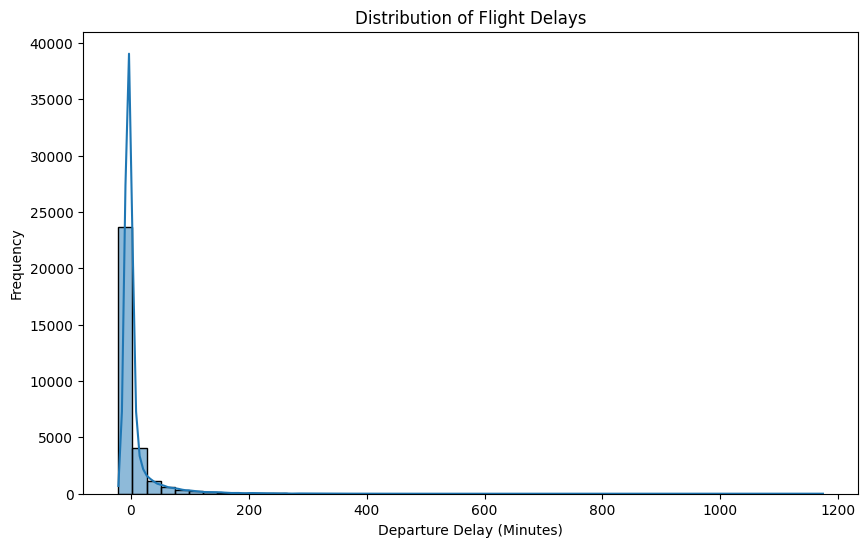

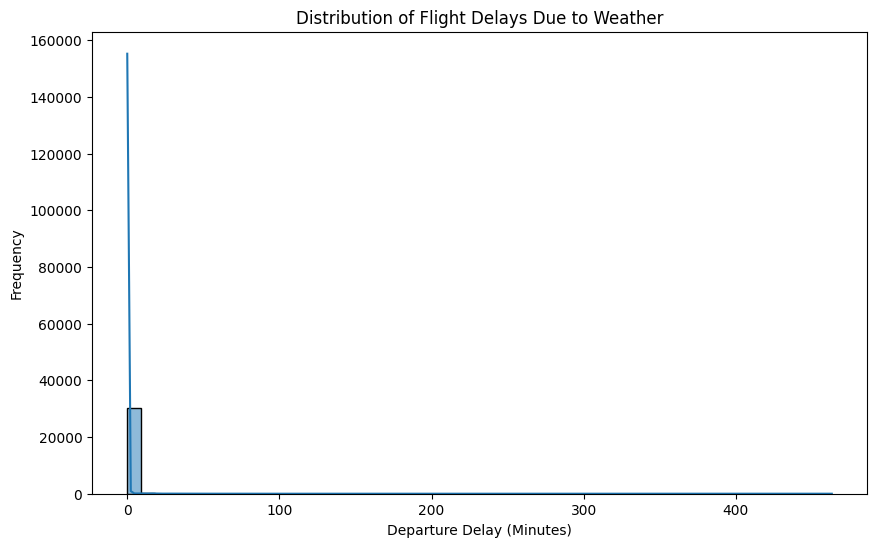

Number of extreme weather delays: 327
Probability: 1.0700611931018684 %


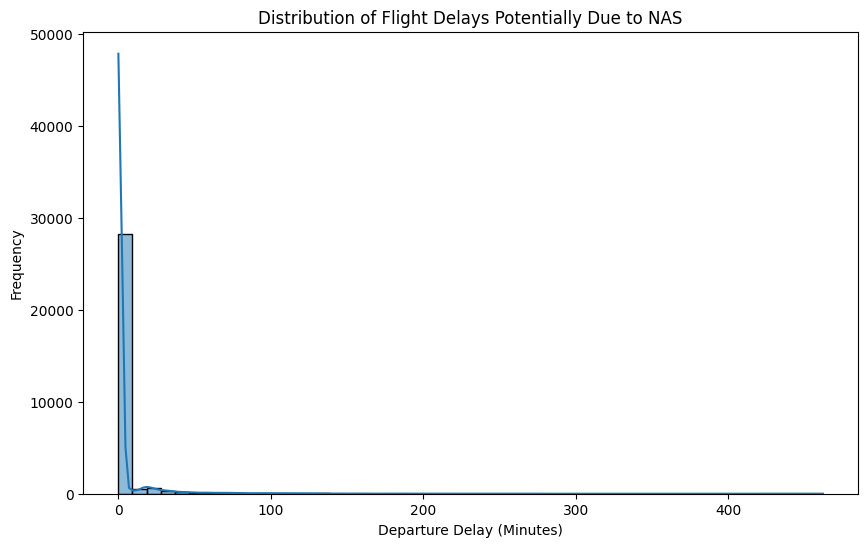

Number of potential NAS-related delays: 2696
Probability: 8.822278215910206 %


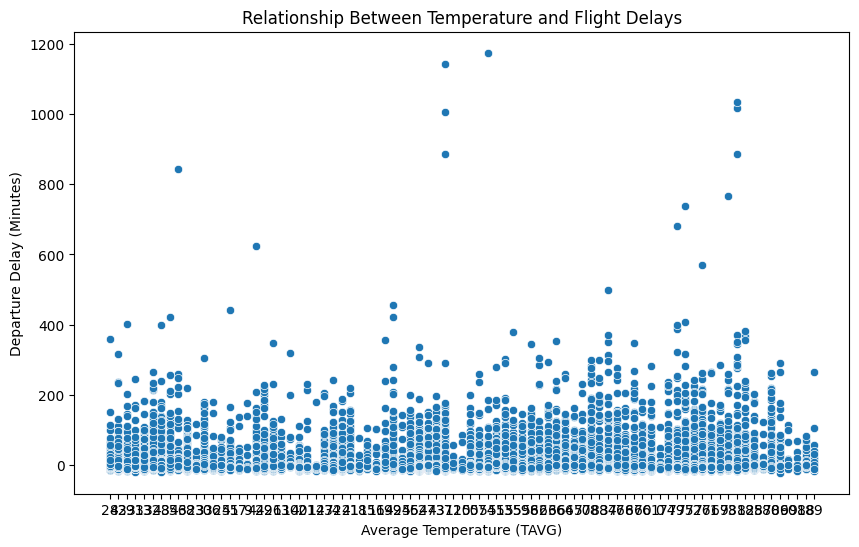

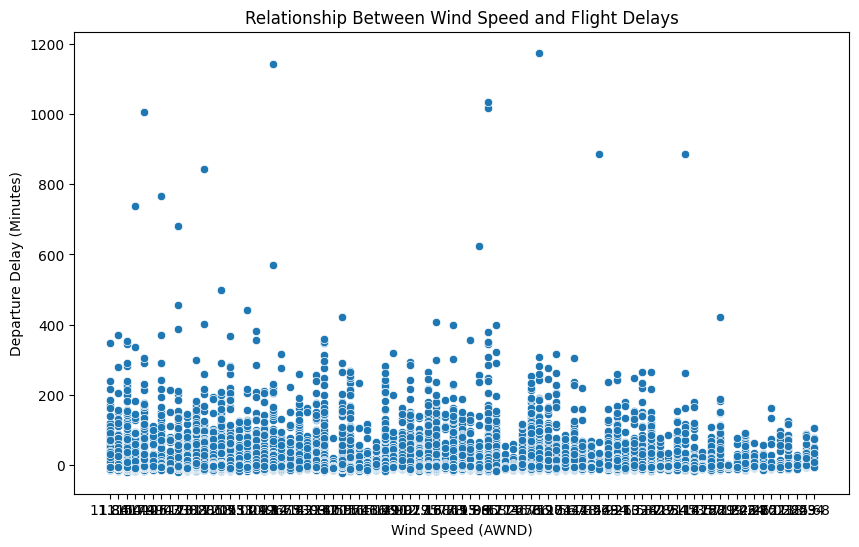

Departure delay (Minutes)    0
AWND                         0
TAVG                         0
PRCP                         0
TMAX                         0
TMIN                         0
SNOW                         0
SNWD                         0
WDF2                         0
WDF5                         0
WSF2                         0
WSF5                         0
dtype: int64
                           Departure delay (Minutes)
Departure delay (Minutes)                        1.0


C:\Users\rapha\AppData\Local\Temp\ipykernel_1916\3457543678.py:58: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_merged1[columns_of_interest].corr()


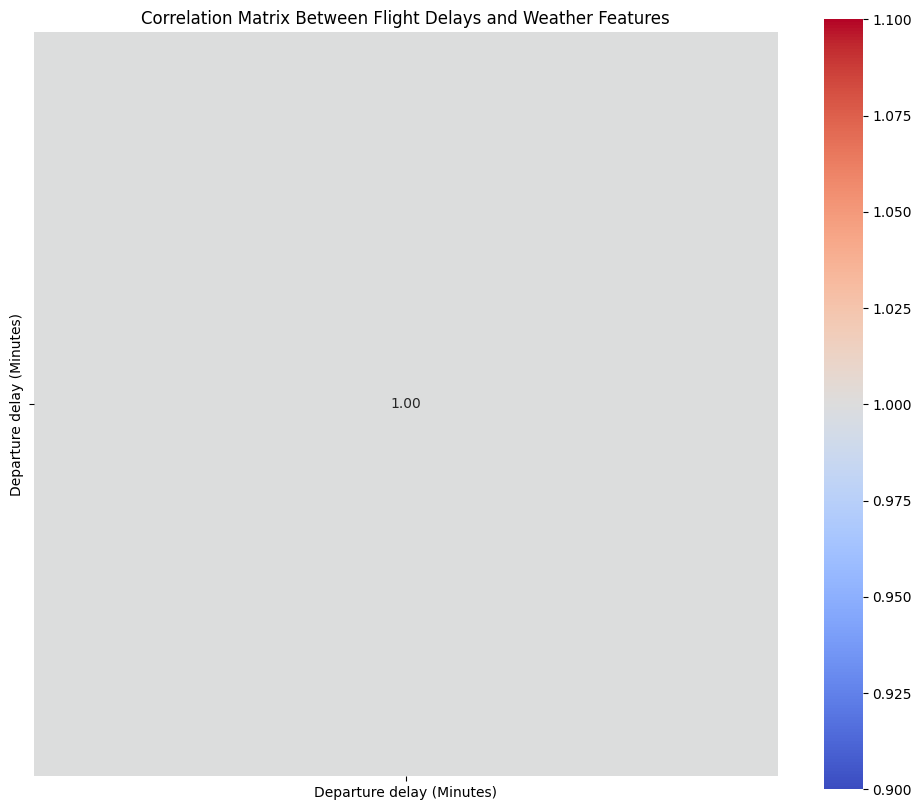

In [60]:
# Flight delay histogram (general)
import matplotlib.pyplot as plt 
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df_merged['Departure delay (Minutes)'], bins=50, kde=True)
plt.title('Distribution of Flight Delays')
plt.xlabel('Departure Delay (Minutes)')
plt.ylabel('Frequency')
plt.show()

# Flight delay histogram (weather)
plt.figure(figsize=(10, 6))
sns.histplot(df_merged['Delay Weather (Minutes)'], bins=50, kde=True)
plt.title('Distribution of Flight Delays Due to Weather')
plt.xlabel('Departure Delay (Minutes)')
plt.ylabel('Frequency')
plt.show()
print("Number of extreme weather delays:", len(df_merged[df_merged['Delay Weather (Minutes)'] > 0])) 
print("Probability:", (len(df_merged[df_merged['Delay Weather (Minutes)'] > 0]) / len(df_merged['Departure delay (Minutes)'])) * 100, "%") 

# Flight delay histogram (NAS)
plt.figure(figsize=(10, 6))
sns.histplot(df_merged['Delay National Aviation System (Minutes)'], bins=50, kde=True)
plt.title('Distribution of Flight Delays Potentially Due to NAS')
plt.xlabel('Departure Delay (Minutes)')
plt.ylabel('Frequency')
plt.show()
print("Number of potential NAS-related delays:", len(df_merged[df_merged['Delay National Aviation System (Minutes)'] > 0])) 
print("Probability:", (len(df_merged[df_merged['Delay National Aviation System (Minutes)'] > 0]) / len(df_merged['Departure delay (Minutes)'])) * 100, "%") 

# Scatter plot between departure delay and average temperature (TAVG)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_merged, x='TAVG', y='Departure delay (Minutes)')
plt.title('Relationship Between Temperature and Flight Delays')
plt.xlabel('Average Temperature (TAVG)')
plt.ylabel('Departure Delay (Minutes)')
plt.show()

# Scatter plot between departure delay and wind speed (AWND)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_merged, x='AWND', y='Departure delay (Minutes)')
plt.title('Relationship Between Wind Speed and Flight Delays')
plt.xlabel('Wind Speed (AWND)')
plt.ylabel('Departure Delay (Minutes)')
plt.show()

# Relevant columns
columns_of_interest = [
    'Departure delay (Minutes)', 'AWND', 'TAVG', 'PRCP', 'TMAX', 'TMIN', 
    'SNOW', 'SNWD', 'WDF2', 'WDF5', 'WSF2', 'WSF5'
]
df_merged1 = df_merged.copy()
df_merged1 = df_merged1.fillna(0) 
print(df_merged1[columns_of_interest].isnull().sum())

# Calculate the correlation matrix
correlation_matrix = df_merged1[columns_of_interest].corr()
print(correlation_matrix)
# Display the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix Between Flight Delays and Weather Features')
plt.show()


Fusion des données pour rassembler les problème météo 

In [61]:
# Resizing the dataframe 
df_merged = df_merged.drop(['Carrier Code', 'STATION', 'NAME', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'DATE'], axis=1, errors='ignore')

# Merging fog data
fusion_fog = df_merged['WT01']

for col in ['WT02', 'WT22']:
    fusion_fog = fusion_fog.combine_first(df_merged[col])

df_merged['WT_FOG'] = fusion_fog

# Merging hail and frost data
fusion_Hail = df_merged['WT04']
for col1 in ['WT05', 'WT06']:
    fusion_Hail = fusion_Hail.combine_first(df_merged[col1])

df_merged['WT_HAIL'] = fusion_Hail

# Merging rain data
fusion_rain = df_merged['WT16']
for col2 in ['WT17', 'WT19', 'WT14', 'WT15']:
    fusion_rain = fusion_rain.combine_first(df_merged[col1])

df_merged['WT_RAIN'] = fusion_rain

# Merging snow data
fusion_snow = df_merged['WT09']
fusion_snow = fusion_snow.combine_first(df_merged["WT18"])

df_merged['WT_SNOW'] = fusion_snow

# Dropping the original weather columns after merging
df_merged1 = df_merged.drop(["WT01", "WT02", "WT22", "WT05", "WT06", "WT16", "WT14", "WT15", "WT17", "WT19", "WT09", "WT18"], axis=1, errors='ignore')

print(df_merged1)


      Date (MM/DD/YYYY)  Flight Number Destination Airport  \
0            2002-01-01           43.0                 LAX   
1            2002-01-01           93.0                 DFW   
2            2002-01-01          119.0                 LAX   
3            2002-01-01          159.0                 LAX   
4            2002-01-01          373.0                 DFW   
...                 ...            ...                 ...   
30554        2004-12-31         1869.0                 SJU   
30555        2004-12-31         1927.0                 ORD   
30556        2004-12-31         1929.0                 ORD   
30557        2004-12-31         1999.0                 MIA   
30558        2004-12-31         2397.0                 EGE   

      Scheduled departure time Actual departure time  \
0                        08:15                 08:50   
1                        18:20                 18:20   
2                        17:35                 17:34   
3                        15:00 

Analysis and probability according to some weather events

In [62]:
# Number of thunderstorms and probabilities
number_thunderstorms = len(df_merged[~pd.isna(df_merged['WT03'])])
prob_thunderstorms = (number_thunderstorms / len(df_merged)) * 100
delays_with_thunderstorms = len(df_merged[
    ((df_merged['Delay National Aviation System (Minutes)'] > 0) |
     (df_merged['Delay Weather (Minutes)'] > 0)) & 
    (~pd.isna(df_merged['WT03']))
])
weather_delays_with_thunderstorms = len(df_merged[
    (df_merged['Delay Weather (Minutes)'] > 0) & 
    (~pd.isna(df_merged['WT03']))
])
prob_delays_with_thunderstorms = (delays_with_thunderstorms / number_thunderstorms) * 100 if number_thunderstorms > 0 else 0
prob_weather_delays_with_thunderstorms = (weather_delays_with_thunderstorms / number_thunderstorms) * 100 if number_thunderstorms > 0 else 0

print("Number of thunderstorms:", number_thunderstorms)
print("Probability of thunderstorms:", prob_thunderstorms, "%")
print("Flight delays with thunderstorms:", delays_with_thunderstorms)
print("Probability of delay with thunderstorms:", prob_delays_with_thunderstorms, "%")
print("Delays due to weather only with thunderstorms:", weather_delays_with_thunderstorms)
print("Probability of weather delay with thunderstorms:", prob_weather_delays_with_thunderstorms, "%")

# Number of rain events and probabilities
number_rain = len(df_merged[~pd.isna(df_merged['WT_RAIN'])])
prob_rain = (number_rain / len(df_merged)) * 100
delays_with_rain = len(df_merged[
    ((df_merged['Delay National Aviation System (Minutes)'] > 0) |
     (df_merged['Delay Weather (Minutes)'] > 0)) & 
    (~pd.isna(df_merged['WT_RAIN']))
])
weather_delays_with_rain = len(df_merged[
    (df_merged['Delay Weather (Minutes)'] > 0) & 
    (~pd.isna(df_merged['WT_RAIN']))
])
prob_delays_with_rain = (delays_with_rain / number_rain) * 100 if number_rain > 0 else 0
prob_weather_delays_with_rain = (weather_delays_with_rain / number_rain) * 100 if number_rain > 0 else 0

print("\nNumber of rain events:", number_rain)
print("Probability of rain:", prob_rain, "%")
print("Flight delays with rain (Extreme Weather+NAS):", delays_with_rain)
print("Probability of delay with rain:", prob_delays_with_rain, "%")
print("Delays due to weather only with rain:", weather_delays_with_rain)
print("Probability of weather delay with rain:", prob_weather_delays_with_rain, "%")

# Number of snow events and probabilities
number_snow = len(df_merged[~pd.isna(df_merged['WT_SNOW'])])
prob_snow = (number_snow / len(df_merged)) * 100
delays_with_snow = len(df_merged[
    ((df_merged['Delay National Aviation System (Minutes)'] > 0) |
     (df_merged['Delay Weather (Minutes)'] > 0)) & 
    (~pd.isna(df_merged['WT_SNOW']))
])
weather_delays_with_snow = len(df_merged[
    (df_merged['Delay Weather (Minutes)'] > 0) & 
    (~pd.isna(df_merged['WT_SNOW']))
])
prob_delays_with_snow = (delays_with_snow / number_snow) * 100 if number_snow > 0 else 0
prob_weather_delays_with_snow = (weather_delays_with_snow / number_snow) * 100 if number_snow > 0 else 0

print("\nNumber of snow events:", number_snow)
print("Probability of snow:", prob_snow, "%")
print("Flight delays with snow (Extreme Weather+NAS):", delays_with_snow)
print("Probability of delay with snow:", prob_delays_with_snow, "%")
print("Delays due to weather only with snow:", weather_delays_with_snow)
print("Probability of weather delay with snow:", prob_weather_delays_with_snow, "%")

# Number of frost/hail events and probabilities
number_frost_hail = len(df_merged[~pd.isna(df_merged['WT_HAIL'])])
prob_frost_hail = (number_frost_hail / len(df_merged)) * 100
delays_with_frost_hail = len(df_merged[
    ((df_merged['Delay National Aviation System (Minutes)'] > 0) |
     (df_merged['Delay Weather (Minutes)'] > 0)) & 
    (~pd.isna(df_merged['WT_HAIL']))
])
weather_delays_with_frost_hail = len(df_merged[
    (df_merged['Delay Weather (Minutes)'] > 0) & 
    (~pd.isna(df_merged['WT_HAIL']))
])
prob_delays_with_frost_hail = (delays_with_frost_hail / number_frost_hail) * 100 if number_frost_hail > 0 else 0
prob_weather_delays_with_frost_hail = (weather_delays_with_frost_hail / number_frost_hail) * 100 if number_frost_hail > 0 else 0

print("\nNumber of frost/hail events:", number_frost_hail)
print("Probability of frost/hail:", prob_frost_hail, "%")
print("Flight delays with frost/hail (Extreme Weather+NAS):", delays_with_frost_hail)
print("Probability of delay with frost/hail:", prob_delays_with_frost_hail, "%")
print("Delays due to weather only with frost/hail:", weather_delays_with_frost_hail)
print("Probability of weather delay with frost/hail:", prob_weather_delays_with_frost_hail, "%")


Number of thunderstorms: 2329
Probability of thunderstorms: 7.621322687260709 %
Flight delays with thunderstorms: 392
Probability of delay with thunderstorms: 16.83125805066552 %
Delays due to weather only with thunderstorms: 48
Probability of weather delay with thunderstorms: 2.06097037355088 %

Number of rain events: 13122
Probability of rain: 42.939886776399746 %
Flight delays with rain (Extreme Weather+NAS): 1526
Probability of delay with rain: 11.629324798049078 %
Delays due to weather only with rain: 166
Probability of weather delay with rain: 1.2650510592897424 %

Number of snow events: 2576
Probability of snow: 8.429595209267319 %
Flight delays with snow (Extreme Weather+NAS): 337
Probability of delay with snow: 13.082298136645962 %
Delays due to weather only with snow: 154
Probability of weather delay with snow: 5.978260869565218 %

Number of frost/hail events: 704
Probability of frost/hail: 2.3037403056382737 %
Flight delays with frost/hail (Extreme Weather+NAS): 112
Probabil

dataset split by month:
I split the dataset to retrieve a dataset containing airport and weather information for the following date range:
December 5, 2003 to January 18, 2004. This choice of data was made to retrieve the maximum amount of useful information for the dataset.

In [63]:
begin = "2003-12-05"
end = "2004-01-18"

# Filter the dataset by date range
dataset2002 = df_merged1[(df_merged1['Date (MM/DD/YYYY)'] >= begin) & (df_merged1['Date (MM/DD/YYYY)'] <= end)]

# Flights with weather delay
weather_delay_data = dataset2002[dataset2002['Delay Weather (Minutes)'] > 0]

# Flights with NAS delay
nas_delay_data = dataset2002[dataset2002['Delay National Aviation System (Minutes)'] > 0]

# Probability of weather delay
delay_probability_weather = len(weather_delay_data) / len(dataset2002) if len(dataset2002) > 0 else 0

# Probability of NAS delay
delay_probability_nas = len(nas_delay_data) / len(dataset2002) if len(dataset2002) > 0 else 0

# Display the results
print("Number of flights with weather delay:", len(weather_delay_data))
print("Number of flights with NAS delay:", len(nas_delay_data))
print("Total number of flights:", len(dataset2002))
print("Probability of delay due to weather for a flight:", delay_probability_weather)
print("Probability of delay due to NAS for a flight:", delay_probability_nas)



Number of flights with weather delay: 88
Number of flights with NAS delay: 299
Total number of flights: 1161
Probability of delay due to weather for a flight: 0.07579672695951765
Probability of delay due to NAS for a flight: 0.2575366063738157


Simulation of Montecarlo

In [72]:
import numpy as np 
def simulate_monte_carlo(model, X_test, n_simulations=1000):
    """
    Simule random scénarios for the test data and make calculation of the meaning's probability delay.
    """
    simulated_probs = []
    
    for _ in range(n_simulations):
        # perturbation of  weather's event with random noise
        X_simulated = X_test.copy()
        for col in ['AWND', 'PRCP', 'SNOW', 'SNWD', 'TAVG', 'TMAX', 'TMIN']:
            X_simulated[col] += np.random.normal(0, 0.1, size=X_simulated.shape[0])  # add gaussien noising
        
        # probability prediction
        probs = model.predict_proba(X_simulated)[:, 1]
        simulated_probs.append(probs)
    
    # mean of  probability for each observation 
    avg_probs = np.mean(simulated_probs, axis=0)
    return avg_probs

Application of Machine Learning Model on the above dataset over 43 days with 1161 flights

1st model: logistic regression model on the Dataset
- dataset construction
- Data processing
- normalization
- division of the whole data
- Data training
- data prediction & model result (confusion matrix)

Number of 1s in Vol_Retarde_Meteo: 88
Number of 1s in Vol_Retarde_Meteo_NAS: 186


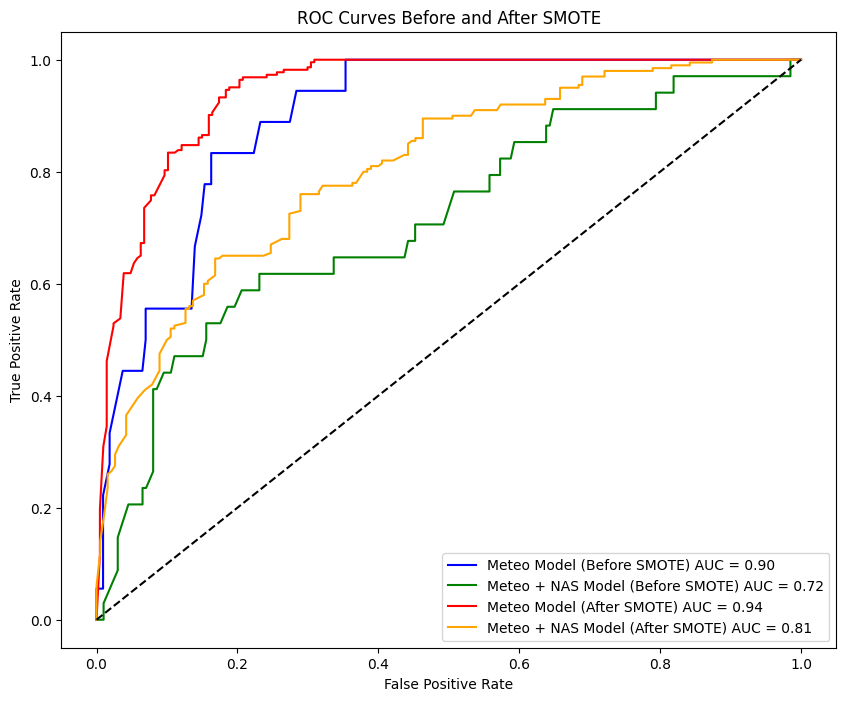

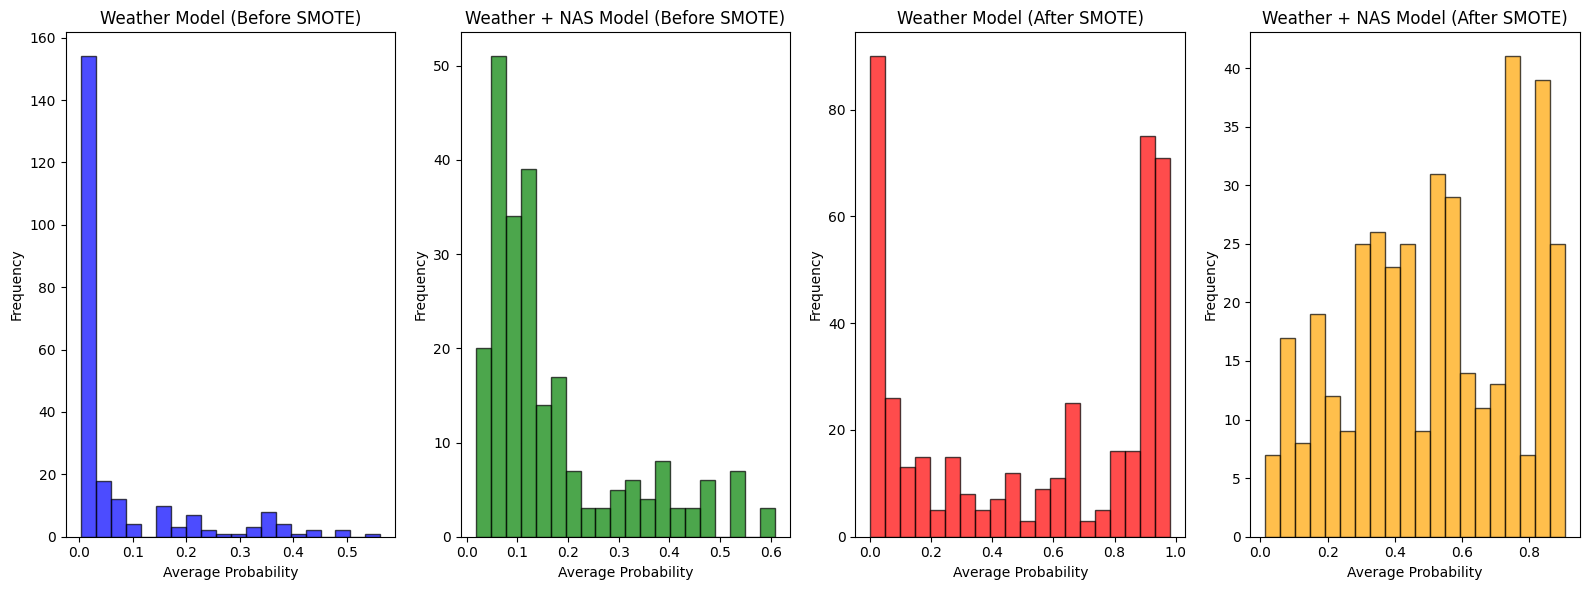


=== Model for delays due only to weather ===
Classification report before SMOTE:
               precision    recall  f1-score   support

           0       0.93      1.00      0.96       215
           1       1.00      0.06      0.11        18

    accuracy                           0.93       233
   macro avg       0.96      0.53      0.53       233
weighted avg       0.93      0.93      0.90       233

Classification report after SMOTE:
               precision    recall  f1-score   support

           0       0.89      0.84      0.86       207
           1       0.86      0.90      0.88       223

    accuracy                           0.87       430
   macro avg       0.87      0.87      0.87       430
weighted avg       0.87      0.87      0.87       430


=== Model for delays due to weather + NAS ===
Classification report before SMOTE:
               precision    recall  f1-score   support

           0       0.87      0.97      0.91       199
           1       0.40      0.12 

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score

# Filling missing values with 0
dataset2002 = dataset2002.fillna(0)

# Creating target variables
dataset2002['Vol_Retarde_Meteo'] = dataset2002['Delay Weather (Minutes)'].apply(lambda x: 1 if x > 0 else 0)
dataset2002['Vol_Retarde_Meteo_NAS'] = dataset2002.apply(lambda x: 1 if (x['Delay Weather (Minutes)'] > 0 or (x['Delay National Aviation System (Minutes)'] > 0 and np.random.rand() < 0.5)) else 0, axis=1)

# Print for verification
print("Number of 1s in Vol_Retarde_Meteo:", dataset2002['Vol_Retarde_Meteo'].sum())
print("Number of 1s in Vol_Retarde_Meteo_NAS:", dataset2002['Vol_Retarde_Meteo_NAS'].sum())

# Data preparation
features = [
    'AWND', 'DAEV', 'DAPR', 'DASF', 'EVAP', 'FMTM', 
    'MDEV', 'MDPR', 'MDSF', 'MNPN', 'MXPN', 'PGTM', 
    'PRCP', 'PSUN', 'SNOW', 'SNWD', 'TAVG', 'TMAX', 
    'TMIN', 'TOBS', 'TSUN', 'WDF2', 'WDF5', 'WDMV', 
    'WESD', 'WSF2', 'WSF5', 'WT03', 'WT04', 'WT07', 
    'WT08', 'WT10', 'WT11', 'WT13', 'WT_FOG', 
    'WT_HAIL', 'WT_RAIN', 'WT_SNOW'
]
df_logistic_model = dataset2002[['Vol_Retarde_Meteo', 'Vol_Retarde_Meteo_NAS'] + features + ['Destination Airport']]

# Encoding and normalization
df_encoded = pd.get_dummies(df_logistic_model, columns=['Destination Airport'], drop_first=True)
scaler = StandardScaler()
df_encoded[features] = scaler.fit_transform(df_encoded[features])

# Data splitting
X = df_encoded.drop(['Vol_Retarde_Meteo', 'Vol_Retarde_Meteo_NAS'], axis=1)
y_meteo = df_encoded['Vol_Retarde_Meteo']
y_meteo_nas = df_encoded['Vol_Retarde_Meteo_NAS']

# Applying SMOTE
smote = SMOTE(random_state=42)
X_res_meteo, y_res_meteo = smote.fit_resample(X, y_meteo)
X_res_meteo_nas, y_res_meteo_nas = smote.fit_resample(X, y_meteo_nas)

# Splitting the training and test sets
X_train_meteo, X_test_meteo, y_train_meteo, y_test_meteo = train_test_split(X, y_meteo, test_size=0.2, random_state=42)
X_train_meteo_nas, X_test_meteo_nas, y_train_meteo_nas, y_test_meteo_nas = train_test_split(X, y_meteo_nas, test_size=0.2, random_state=42)

X_train_meteo_smote, X_test_meteo_smote, y_train_meteo_smote, y_test_meteo_smote = train_test_split(X_res_meteo, y_res_meteo, test_size=0.2, random_state=42)
X_train_meteo_nas_smote, X_test_meteo_nas_smote, y_train_meteo_nas_smote, y_test_meteo_nas_smote = train_test_split(X_res_meteo_nas, y_res_meteo_nas, test_size=0.2, random_state=42)

# Models (before and after SMOTE)
model_meteo = LogisticRegression()
model_meteo.fit(X_train_meteo, y_train_meteo)

model_meteo_nas = LogisticRegression()
model_meteo_nas.fit(X_train_meteo_nas, y_train_meteo_nas)

model_meteo_smote = LogisticRegression()
model_meteo_smote.fit(X_train_meteo_smote, y_train_meteo_smote)

model_meteo_nas_smote = LogisticRegression()
model_meteo_nas_smote.fit(X_train_meteo_nas_smote, y_train_meteo_nas_smote)

# Predictions
y_pred_meteo = model_meteo.predict(X_test_meteo)
y_pred_meteo_nas = model_meteo_nas.predict(X_test_meteo_nas)

y_pred_meteo_smote = model_meteo_smote.predict(X_test_meteo_smote)
y_pred_meteo_nas_smote = model_meteo_nas_smote.predict(X_test_meteo_nas_smote)

# ROC curve
fpr_meteo, tpr_meteo, _ = roc_curve(y_test_meteo, model_meteo.predict_proba(X_test_meteo)[:, 1])
roc_auc_meteo = auc(fpr_meteo, tpr_meteo)

fpr_meteo_nas, tpr_meteo_nas, _ = roc_curve(y_test_meteo_nas, model_meteo_nas.predict_proba(X_test_meteo_nas)[:, 1])
roc_auc_meteo_nas = auc(fpr_meteo_nas, tpr_meteo_nas)

fpr_meteo_smote, tpr_meteo_smote, _ = roc_curve(y_test_meteo_smote, model_meteo_smote.predict_proba(X_test_meteo_smote)[:, 1])
roc_auc_meteo_smote = auc(fpr_meteo_smote, tpr_meteo_smote)

fpr_meteo_nas_smote, tpr_meteo_nas_smote, _ = roc_curve(y_test_meteo_nas_smote, model_meteo_nas_smote.predict_proba(X_test_meteo_nas_smote)[:, 1])
roc_auc_meteo_nas_smote = auc(fpr_meteo_nas_smote, tpr_meteo_nas_smote)

#montecarlo simulation 
avg_probs = simulate_monte_carlo(model_meteo, X_test_meteo)
X_test_meteo['Avg_Prob_Delay'] = avg_probs
avg_probs1 = simulate_monte_carlo(model_meteo_nas, X_test_meteo_nas)
X_test_meteo_nas['Avg_Prob_Delay'] = avg_probs1
avg_probs2 = simulate_monte_carlo(model_meteo_smote, X_test_meteo_smote)
X_test_meteo_smote['Avg_Prob_Delay'] = avg_probs2
avg_probs3 = simulate_monte_carlo(model_meteo_nas_smote, X_test_meteo_nas_smote)
X_test_meteo_nas_smote['Avg_Prob_Delay'] = avg_probs3


# Plotting
plt.figure(figsize=(10, 8))

plt.plot(fpr_meteo, tpr_meteo, color='blue', label=f'Meteo Model (Before SMOTE) AUC = {roc_auc_meteo:.2f}')
plt.plot(fpr_meteo_nas, tpr_meteo_nas, color='green', label=f'Meteo + NAS Model (Before SMOTE) AUC = {roc_auc_meteo_nas:.2f}')
plt.plot(fpr_meteo_smote, tpr_meteo_smote, color='red', label=f'Meteo Model (After SMOTE) AUC = {roc_auc_meteo_smote:.2f}')
plt.plot(fpr_meteo_nas_smote, tpr_meteo_nas_smote, color='orange', label=f'Meteo + NAS Model (After SMOTE) AUC = {roc_auc_meteo_nas_smote:.2f}')

plt.plot([0, 1], [0, 1], color='black', linestyle='--')  # Chance diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Before and After SMOTE')
plt.legend(loc='lower right')
plt.show()

# Plotting histograms for the mean probabilities (Monte Carlo simulation)
plt.figure(figsize=(16, 6))

plt.subplot(1, 4, 1)
plt.hist(avg_probs, bins=20, color='blue', alpha=0.7, edgecolor='black')
plt.xlabel('Average Probability')
plt.ylabel('Frequency')
plt.title('Weather Model (Before SMOTE)')

plt.subplot(1, 4, 2)
plt.hist(avg_probs1, bins=20, color='green', alpha=0.7, edgecolor='black')
plt.xlabel('Average Probability')
plt.ylabel('Frequency')
plt.title('Weather + NAS Model (Before SMOTE)')

plt.subplot(1, 4, 3)
plt.hist(avg_probs2, bins=20, color='red', alpha=0.7, edgecolor='black')
plt.xlabel('Average Probability')
plt.ylabel('Frequency')
plt.title('Weather Model (After SMOTE)')

plt.subplot(1, 4, 4)
plt.hist(avg_probs3, bins=20, color='orange', alpha=0.7, edgecolor='black')
plt.xlabel('Average Probability')
plt.ylabel('Frequency')
plt.title('Weather + NAS Model (After SMOTE)')

plt.tight_layout()
plt.show()


# Evaluation
print("\n=== Model for delays due only to weather ===")
print("Classification report before SMOTE:\n", classification_report(y_test_meteo, y_pred_meteo))
print("Classification report after SMOTE:\n", classification_report(y_test_meteo_smote, y_pred_meteo_smote))

print("\n=== Model for delays due to weather + NAS ===")
print("Classification report before SMOTE:\n", classification_report(y_test_meteo_nas, y_pred_meteo_nas))
print("Classification report after SMOTE:\n", classification_report(y_test_meteo_nas_smote, y_pred_meteo_nas_smote))

# Comparison of the number of 1s before and after SMOTE
print("\n=== Comparison of the number of 1s before and after SMOTE ===")
print("Number of 1s in y_meteo (before SMOTE):", y_meteo.sum())
print("Number of 1s in y_res_meteo (after SMOTE):", y_res_meteo.sum())

print("Number of 1s in y_meteo_nas (before SMOTE):", y_meteo_nas.sum())
print("Number of 1s in y_res_meteo_nas (after SMOTE):", y_res_meteo_nas.sum())



2nd Machine Learning Model: Random Forest
- Using the Target column: Weather Delay
- Using the Target column: Weather Delay+NAS(50%)

Number of 1s in Vol_Retarde_Meteo: 88
Number of 1s in Vol_Retarde_Meteo_NAS: 195


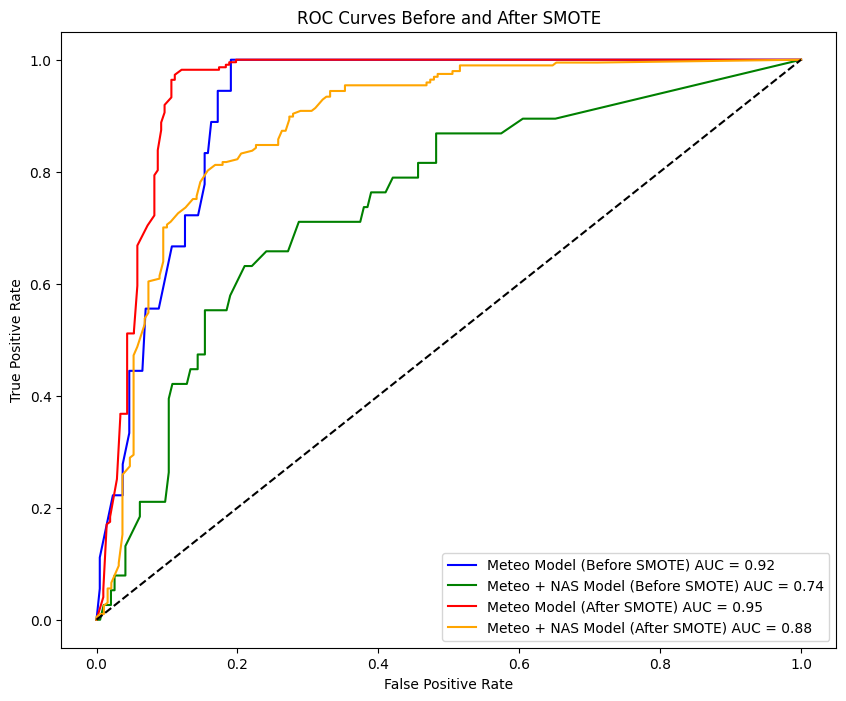

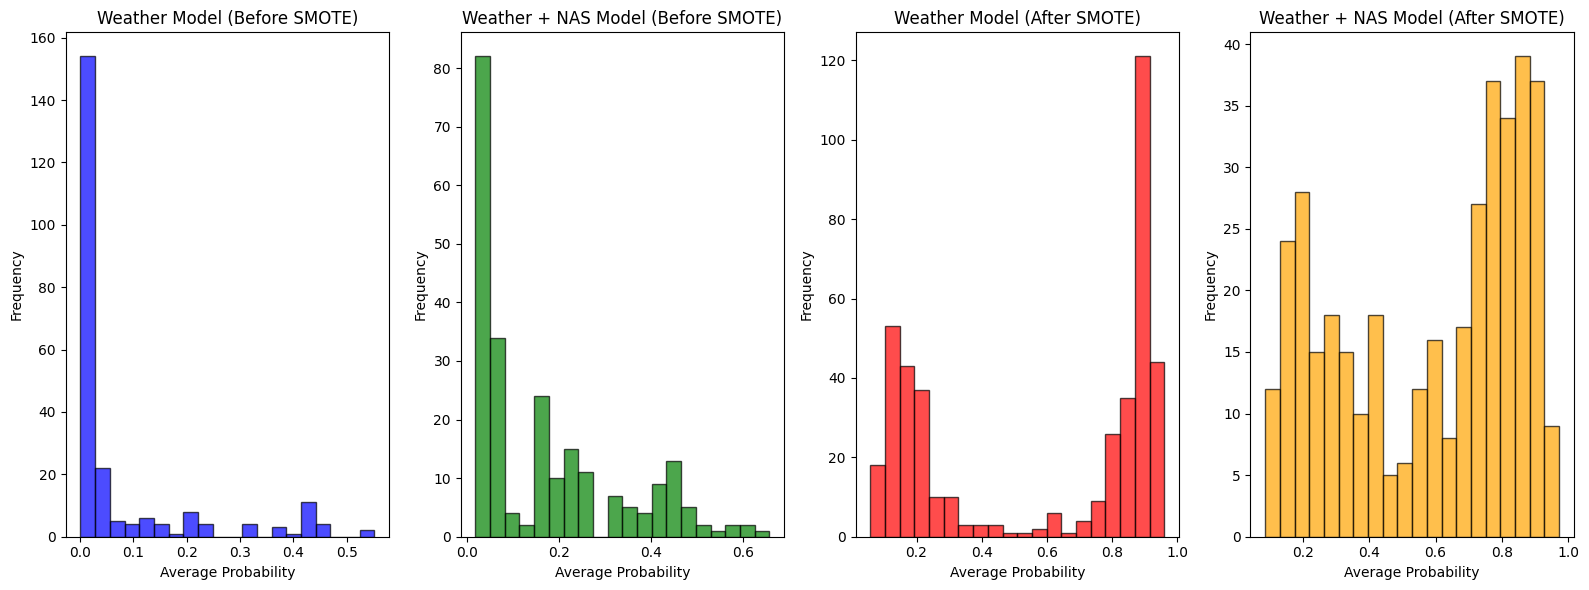


=== Model for delays due only to weather ===
Classification Report Before SMOTE:
               precision    recall  f1-score   support

           0       0.93      1.00      0.96       215
           1       0.67      0.11      0.19        18

    accuracy                           0.93       233
   macro avg       0.80      0.55      0.58       233
weighted avg       0.91      0.93      0.90       233

Classification Report After SMOTE:
               precision    recall  f1-score   support

           0       0.98      0.86      0.91       207
           1       0.88      0.98      0.93       223

    accuracy                           0.92       430
   macro avg       0.93      0.92      0.92       430
weighted avg       0.93      0.92      0.92       430


=== Model for delays due to weather + NAS ===
Classification Report Before SMOTE:
               precision    recall  f1-score   support

           0       0.84      0.96      0.90       195
           1       0.27      0.08 

In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Filling missing values with 0
dataset2002 = dataset2002.fillna(0)

# Creating target variables
dataset2002['Vol_Retarde_Meteo'] = dataset2002['Delay Weather (Minutes)'].apply(lambda x: 1 if x > 0 else 0)
dataset2002['Vol_Retarde_Meteo_NAS'] = dataset2002.apply(lambda x: 1 if (x['Delay Weather (Minutes)'] > 0 or (x['Delay National Aviation System (Minutes)'] > 0 and np.random.rand() < 0.5)) else 0, axis=1)

# Print for verification
print("Number of 1s in Vol_Retarde_Meteo:", dataset2002['Vol_Retarde_Meteo'].sum())
print("Number of 1s in Vol_Retarde_Meteo_NAS:", dataset2002['Vol_Retarde_Meteo_NAS'].sum())

# Preparing the data
features = [
    'AWND', 'DAEV', 'DAPR', 'DASF', 'EVAP', 'FMTM', 
    'MDEV', 'MDPR', 'MDSF', 'MNPN', 'MXPN', 'PGTM', 
    'PRCP', 'PSUN', 'SNOW', 'SNWD', 'TAVG', 'TMAX', 
    'TMIN', 'TOBS', 'TSUN', 'WDF2', 'WDF5', 'WDMV', 
    'WESD', 'WSF2', 'WSF5', 'WT03', 'WT04', 'WT07', 
    'WT08', 'WT10', 'WT11', 'WT13', 'WT_FOG', 
    'WT_HAIL', 'WT_RAIN', 'WT_SNOW'
]
df_rf_model = dataset2002[['Vol_Retarde_Meteo', 'Vol_Retarde_Meteo_NAS'] + features + ['Destination Airport']]

# Encoding and normalization
df_encoded = pd.get_dummies(df_rf_model, columns=['Destination Airport'], drop_first=True)
scaler = StandardScaler()
df_encoded[features] = scaler.fit_transform(df_encoded[features])

# Splitting the data
X = df_encoded.drop(['Vol_Retarde_Meteo', 'Vol_Retarde_Meteo_NAS'], axis=1)
y_meteo = df_encoded['Vol_Retarde_Meteo']
y_meteo_nas = df_encoded['Vol_Retarde_Meteo_NAS']

# Applying SMOTE
smote = SMOTE(random_state=42)
X_res_meteo, y_res_meteo = smote.fit_resample(X, y_meteo)
X_res_meteo_nas, y_res_meteo_nas = smote.fit_resample(X, y_meteo_nas)

# Splitting training and test sets
X_train_meteo, X_test_meteo, y_train_meteo, y_test_meteo = train_test_split(X, y_meteo, test_size=0.2, random_state=42)
X_train_meteo_nas, X_test_meteo_nas, y_train_meteo_nas, y_test_meteo_nas = train_test_split(X, y_meteo_nas, test_size=0.2, random_state=42)

X_train_meteo_smote, X_test_meteo_smote, y_train_meteo_smote, y_test_meteo_smote = train_test_split(X_res_meteo, y_res_meteo, test_size=0.2, random_state=42)
X_train_meteo_nas_smote, X_test_meteo_nas_smote, y_train_meteo_nas_smote, y_test_meteo_nas_smote = train_test_split(X_res_meteo_nas, y_res_meteo_nas, test_size=0.2, random_state=42)

# Random Forest models (before and after SMOTE)
model_meteo = RandomForestClassifier(random_state=42)
model_meteo.fit(X_train_meteo, y_train_meteo)

model_meteo_nas = RandomForestClassifier(random_state=42)
model_meteo_nas.fit(X_train_meteo_nas, y_train_meteo_nas)

model_meteo_smote = RandomForestClassifier(random_state=42)
model_meteo_smote.fit(X_train_meteo_smote, y_train_meteo_smote)

model_meteo_nas_smote = RandomForestClassifier(random_state=42)
model_meteo_nas_smote.fit(X_train_meteo_nas_smote, y_train_meteo_nas_smote)

# Predictions
y_pred_meteo = model_meteo.predict(X_test_meteo)
y_pred_meteo_nas = model_meteo_nas.predict(X_test_meteo_nas)

y_pred_meteo_smote = model_meteo_smote.predict(X_test_meteo_smote)
y_pred_meteo_nas_smote = model_meteo_nas_smote.predict(X_test_meteo_nas_smote)

# ROC
fpr_meteo, tpr_meteo, _ = roc_curve(y_test_meteo, model_meteo.predict_proba(X_test_meteo)[:, 1])
roc_auc_meteo = auc(fpr_meteo, tpr_meteo)

fpr_meteo_nas, tpr_meteo_nas, _ = roc_curve(y_test_meteo_nas, model_meteo_nas.predict_proba(X_test_meteo_nas)[:, 1])
roc_auc_meteo_nas = auc(fpr_meteo_nas, tpr_meteo_nas)

fpr_meteo_smote, tpr_meteo_smote, _ = roc_curve(y_test_meteo_smote, model_meteo_smote.predict_proba(X_test_meteo_smote)[:, 1])
roc_auc_meteo_smote = auc(fpr_meteo_smote, tpr_meteo_smote)

fpr_meteo_nas_smote, tpr_meteo_nas_smote, _ = roc_curve(y_test_meteo_nas_smote, model_meteo_nas_smote.predict_proba(X_test_meteo_nas_smote)[:, 1])
roc_auc_meteo_nas_smote = auc(fpr_meteo_nas_smote, tpr_meteo_nas_smote)

#montecarlo simulation 
avg_probs4 = simulate_monte_carlo(model_meteo, X_test_meteo)
X_test_meteo['Avg_Prob_Delay'] = avg_probs4
avg_probs5 = simulate_monte_carlo(model_meteo_nas, X_test_meteo_nas)
X_test_meteo_nas['Avg_Prob_Delay'] = avg_probs5
avg_probs6 = simulate_monte_carlo(model_meteo_smote, X_test_meteo_smote)
X_test_meteo_smote['Avg_Prob_Delay'] = avg_probs6
avg_probs7 = simulate_monte_carlo(model_meteo_nas_smote, X_test_meteo_nas_smote)
X_test_meteo_nas_smote['Avg_Prob_Delay'] = avg_probs7



# Plotting
plt.figure(figsize=(10, 8))

plt.plot(fpr_meteo, tpr_meteo, color='blue', label=f'Meteo Model (Before SMOTE) AUC = {roc_auc_meteo:.2f}')
plt.plot(fpr_meteo_nas, tpr_meteo_nas, color='green', label=f'Meteo + NAS Model (Before SMOTE) AUC = {roc_auc_meteo_nas:.2f}')
plt.plot(fpr_meteo_smote, tpr_meteo_smote, color='red', label=f'Meteo Model (After SMOTE) AUC = {roc_auc_meteo_smote:.2f}')
plt.plot(fpr_meteo_nas_smote, tpr_meteo_nas_smote, color='orange', label=f'Meteo + NAS Model (After SMOTE) AUC = {roc_auc_meteo_nas_smote:.2f}')

plt.plot([0, 1], [0, 1], color='black', linestyle='--')  # Chance diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Before and After SMOTE')
plt.legend(loc='lower right')
plt.show()

# Plotting histograms for the mean probabilities (Monte Carlo simulation)
plt.figure(figsize=(16, 6))

plt.subplot(1, 4, 1)
plt.hist(avg_probs4, bins=20, color='blue', alpha=0.7, edgecolor='black')
plt.xlabel('Average Probability')
plt.ylabel('Frequency')
plt.title('Weather Model (Before SMOTE)')

plt.subplot(1, 4, 2)
plt.hist(avg_probs5, bins=20, color='green', alpha=0.7, edgecolor='black')
plt.xlabel('Average Probability')
plt.ylabel('Frequency')
plt.title('Weather + NAS Model (Before SMOTE)')

plt.subplot(1, 4, 3)
plt.hist(avg_probs6, bins=20, color='red', alpha=0.7, edgecolor='black')
plt.xlabel('Average Probability')
plt.ylabel('Frequency')
plt.title('Weather Model (After SMOTE)')

plt.subplot(1, 4, 4)
plt.hist(avg_probs7, bins=20, color='orange', alpha=0.7, edgecolor='black')
plt.xlabel('Average Probability')
plt.ylabel('Frequency')
plt.title('Weather + NAS Model (After SMOTE)')

plt.tight_layout()
plt.show()


# Evaluation
print("\n=== Model for delays due only to weather ===")
print("Classification Report Before SMOTE:\n", classification_report(y_test_meteo, y_pred_meteo))
print("Classification Report After SMOTE:\n", classification_report(y_test_meteo_smote, y_pred_meteo_smote))

print("\n=== Model for delays due to weather + NAS ===")
print("Classification Report Before SMOTE:\n", classification_report(y_test_meteo_nas, y_pred_meteo_nas))
print("Classification Report After SMOTE:\n", classification_report(y_test_meteo_nas_smote, y_pred_meteo_nas_smote))

# Comparing the number of 1s before and after SMOTE
print("\n=== Comparison of the number of 1s before and after SMOTE (only weather) ===")
print("Number of 1s in y_meteo (before SMOTE):", y_train_meteo.sum())
print("Number of 1s in y_meteo_smote (after SMOTE):", y_train_meteo_nas.sum())

print("\n=== Comparison of the number of 1s before and after SMOTE (weather+NAS) ===")
print("Number of 1s in y_meteo (before SMOTE):", y_train_meteo_smote.sum())
print("Number of 1s in y_meteo_smote (after SMOTE):", y_train_meteo_nas_smote.sum())



3rd Machine Learning Model: Decision Tree 
- Use of the Target column: Weather Delay 
- Use of the Target column: Weather Delay+NAS(50%)

Number of 1's in Vol_Retarde_Meteo: 88
Number of 1's in Vol_Retarde_Meteo_NAS: 207


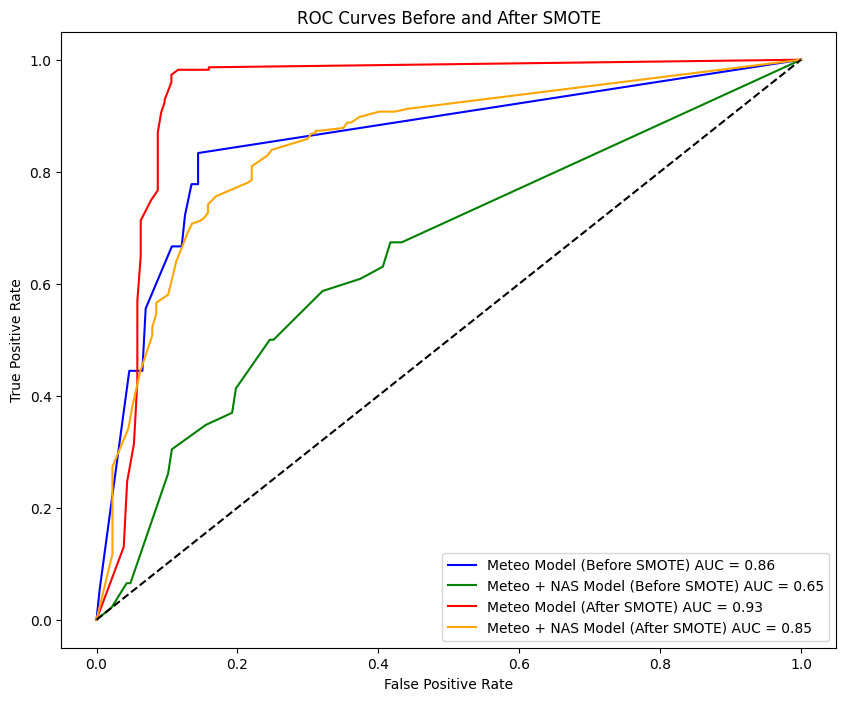

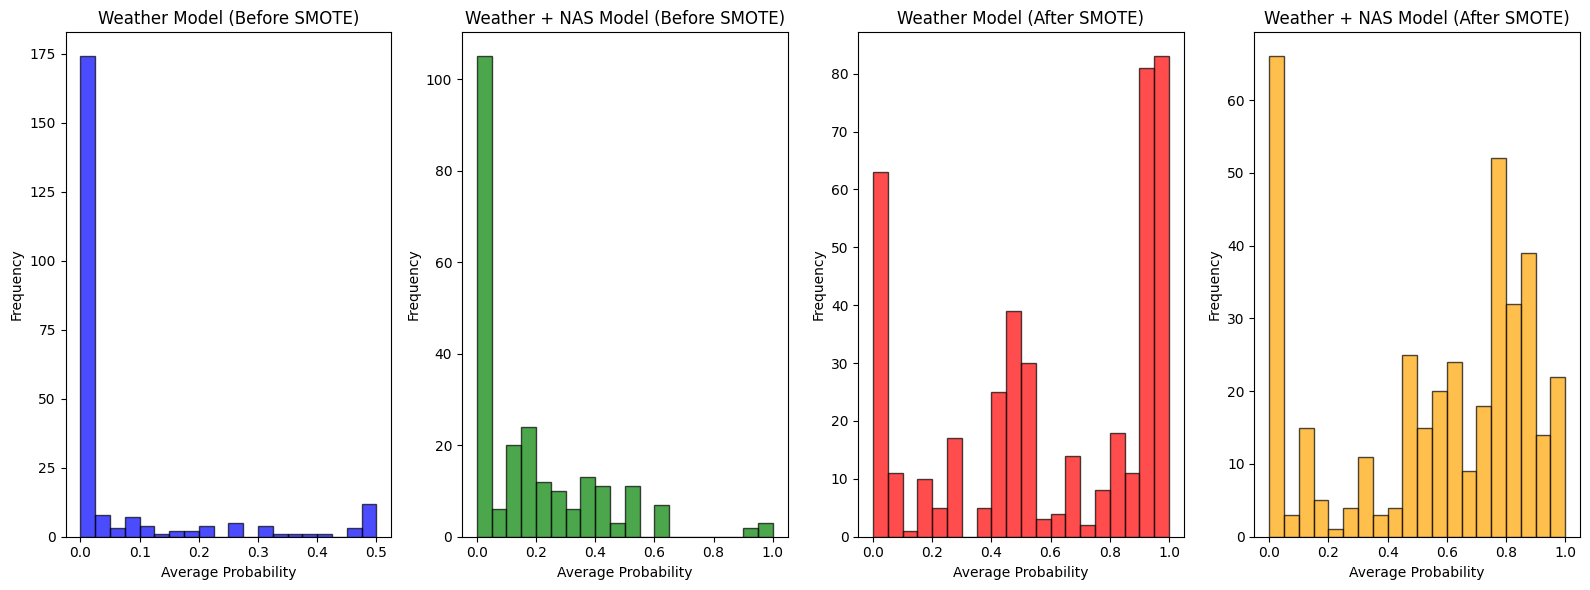


=== Model for weather-related delays only ===
Classification report before SMOTE:
               precision    recall  f1-score   support

           0       0.93      1.00      0.96       215
           1       0.50      0.06      0.10        18

    accuracy                           0.92       233
   macro avg       0.71      0.53      0.53       233
weighted avg       0.89      0.92      0.89       233

Classification report after SMOTE:
               precision    recall  f1-score   support

           0       0.98      0.87      0.92       207
           1       0.89      0.98      0.94       223

    accuracy                           0.93       430
   macro avg       0.94      0.93      0.93       430
weighted avg       0.93      0.93      0.93       430


=== Model for weather + NAS delays ===
Classification report before SMOTE:
               precision    recall  f1-score   support

           0       0.81      0.95      0.87       187
           1       0.25      0.07      0

In [67]:
from sklearn.tree import DecisionTreeClassifier

# Fill missing values with 0
dataset2002 = dataset2002.fillna(0)

# Creating target variables
dataset2002['Vol_Retarde_Meteo'] = dataset2002['Delay Weather (Minutes)'].apply(lambda x: 1 if x > 0 else 0)
dataset2002['Vol_Retarde_Meteo_NAS'] = dataset2002.apply(lambda x: 1 if (x['Delay Weather (Minutes)'] > 0 or (x['Delay National Aviation System (Minutes)'] > 0 and np.random.rand() < 0.5)) else 0, axis=1)

# Print to check
print("Number of 1's in Vol_Retarde_Meteo:", dataset2002['Vol_Retarde_Meteo'].sum())
print("Number of 1's in Vol_Retarde_Meteo_NAS:", dataset2002['Vol_Retarde_Meteo_NAS'].sum())

# Prepare the data
features = [
    'AWND', 'DAEV', 'DAPR', 'DASF', 'EVAP', 'FMTM', 
    'MDEV', 'MDPR', 'MDSF', 'MNPN', 'MXPN', 'PGTM', 
    'PRCP', 'PSUN', 'SNOW', 'SNWD', 'TAVG', 'TMAX', 
    'TMIN', 'TOBS', 'TSUN', 'WDF2', 'WDF5', 'WDMV', 
    'WESD', 'WSF2', 'WSF5', 'WT03', 'WT04', 'WT07', 
    'WT08', 'WT10', 'WT11', 'WT13', 'WT_FOG', 
    'WT_HAIL', 'WT_RAIN', 'WT_SNOW'
]
df_rf_model = dataset2002[['Vol_Retarde_Meteo', 'Vol_Retarde_Meteo_NAS'] + features + ['Destination Airport']]

# Encoding and normalization
df_encoded = pd.get_dummies(df_rf_model, columns=['Destination Airport'], drop_first=True)
scaler = StandardScaler()
df_encoded[features] = scaler.fit_transform(df_encoded[features])

# Split the data
X = df_encoded.drop(['Vol_Retarde_Meteo', 'Vol_Retarde_Meteo_NAS'], axis=1)
y_meteo = df_encoded['Vol_Retarde_Meteo']
y_meteo_nas = df_encoded['Vol_Retarde_Meteo_NAS']

# Apply SMOTE
smote = SMOTE(random_state=42)
X_res_meteo, y_res_meteo = smote.fit_resample(X, y_meteo)
X_res_meteo_nas, y_res_meteo_nas = smote.fit_resample(X, y_meteo_nas)

# Split into training and test sets
X_train_meteo, X_test_meteo, y_train_meteo, y_test_meteo = train_test_split(X, y_meteo, test_size=0.2, random_state=42)
X_train_meteo_nas, X_test_meteo_nas, y_train_meteo_nas, y_test_meteo_nas = train_test_split(X, y_meteo_nas, test_size=0.2, random_state=42)

X_train_meteo_smote, X_test_meteo_smote, y_train_meteo_smote, y_test_meteo_smote = train_test_split(X_res_meteo, y_res_meteo, test_size=0.2, random_state=42)
X_train_meteo_nas_smote, X_test_meteo_nas_smote, y_train_meteo_nas_smote, y_test_meteo_nas_smote = train_test_split(X_res_meteo_nas, y_res_meteo_nas, test_size=0.2, random_state=42)

# Decision Tree Models (before and after SMOTE)
model_meteo = DecisionTreeClassifier(random_state=42)
model_meteo.fit(X_train_meteo, y_train_meteo)

model_meteo_nas = DecisionTreeClassifier(random_state=42)
model_meteo_nas.fit(X_train_meteo_nas, y_train_meteo_nas)

model_meteo_smote = DecisionTreeClassifier(random_state=42)
model_meteo_smote.fit(X_train_meteo_smote, y_train_meteo_smote)

model_meteo_nas_smote = DecisionTreeClassifier(random_state=42)
model_meteo_nas_smote.fit(X_train_meteo_nas_smote, y_train_meteo_nas_smote)

# Predictions
y_pred_meteo = model_meteo.predict(X_test_meteo)
y_pred_meteo_nas = model_meteo_nas.predict(X_test_meteo_nas)

y_pred_meteo_smote = model_meteo_smote.predict(X_test_meteo_smote)
y_pred_meteo_nas_smote = model_meteo_nas_smote.predict(X_test_meteo_nas_smote)

# ROC
fpr_meteo, tpr_meteo, _ = roc_curve(y_test_meteo, model_meteo.predict_proba(X_test_meteo)[:, 1])
roc_auc_meteo = auc(fpr_meteo, tpr_meteo)

fpr_meteo_nas, tpr_meteo_nas, _ = roc_curve(y_test_meteo_nas, model_meteo_nas.predict_proba(X_test_meteo_nas)[:, 1])
roc_auc_meteo_nas = auc(fpr_meteo_nas, tpr_meteo_nas)

fpr_meteo_smote, tpr_meteo_smote, _ = roc_curve(y_test_meteo_smote, model_meteo_smote.predict_proba(X_test_meteo_smote)[:, 1])
roc_auc_meteo_smote = auc(fpr_meteo_smote, tpr_meteo_smote)

fpr_meteo_nas_smote, tpr_meteo_nas_smote, _ = roc_curve(y_test_meteo_nas_smote, model_meteo_nas_smote.predict_proba(X_test_meteo_nas_smote)[:, 1])
roc_auc_meteo_nas_smote = auc(fpr_meteo_nas_smote, tpr_meteo_nas_smote)

#montecarlo simulation 
avg_probs8 = simulate_monte_carlo(model_meteo, X_test_meteo)
X_test_meteo['Avg_Prob_Delay'] = avg_probs8
avg_probs9 = simulate_monte_carlo(model_meteo_nas, X_test_meteo_nas)
X_test_meteo_nas['Avg_Prob_Delay'] = avg_probs9
avg_probs10 = simulate_monte_carlo(model_meteo_smote, X_test_meteo_smote)
X_test_meteo_smote['Avg_Prob_Delay'] = avg_probs10
avg_probs11 = simulate_monte_carlo(model_meteo_nas_smote, X_test_meteo_nas_smote)
X_test_meteo_nas_smote['Avg_Prob_Delay'] = avg_probs11


# Plotting
plt.figure(figsize=(10, 8))

plt.plot(fpr_meteo, tpr_meteo, color='blue', label=f'Meteo Model (Before SMOTE) AUC = {roc_auc_meteo:.2f}')
plt.plot(fpr_meteo_nas, tpr_meteo_nas, color='green', label=f'Meteo + NAS Model (Before SMOTE) AUC = {roc_auc_meteo_nas:.2f}')
plt.plot(fpr_meteo_smote, tpr_meteo_smote, color='red', label=f'Meteo Model (After SMOTE) AUC = {roc_auc_meteo_smote:.2f}')
plt.plot(fpr_meteo_nas_smote, tpr_meteo_nas_smote, color='orange', label=f'Meteo + NAS Model (After SMOTE) AUC = {roc_auc_meteo_nas_smote:.2f}')

plt.plot([0, 1], [0, 1], color='black', linestyle='--')  # Diagonal of chance
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Before and After SMOTE')
plt.legend(loc='lower right')
plt.show()

# Plotting histograms for the mean probabilities (Monte Carlo simulation)
plt.figure(figsize=(16, 6))

plt.subplot(1, 4, 1)
plt.hist(avg_probs8, bins=20, color='blue', alpha=0.7, edgecolor='black')
plt.xlabel('Average Probability')
plt.ylabel('Frequency')
plt.title('Weather Model (Before SMOTE)')

plt.subplot(1, 4, 2)
plt.hist(avg_probs9, bins=20, color='green', alpha=0.7, edgecolor='black')
plt.xlabel('Average Probability')
plt.ylabel('Frequency')
plt.title('Weather + NAS Model (Before SMOTE)')

plt.subplot(1, 4, 3)
plt.hist(avg_probs10, bins=20, color='red', alpha=0.7, edgecolor='black')
plt.xlabel('Average Probability')
plt.ylabel('Frequency')
plt.title('Weather Model (After SMOTE)')

plt.subplot(1, 4, 4)
plt.hist(avg_probs11, bins=20, color='orange', alpha=0.7, edgecolor='black')
plt.xlabel('Average Probability')
plt.ylabel('Frequency')
plt.title('Weather + NAS Model (After SMOTE)')

plt.tight_layout()
plt.show()


# Evaluation
print("\n=== Model for weather-related delays only ===")
print("Classification report before SMOTE:\n", classification_report(y_test_meteo, y_pred_meteo))
print("Classification report after SMOTE:\n", classification_report(y_test_meteo_smote, y_pred_meteo_smote))

print("\n=== Model for weather + NAS delays ===")
print("Classification report before SMOTE:\n", classification_report(y_test_meteo_nas, y_pred_meteo_nas))
print("Classification report after SMOTE:\n", classification_report(y_test_meteo_nas_smote, y_pred_meteo_nas_smote))

# Comparison of the number of 1's before and after SMOTE
print("\n=== Comparison of the number of 1's before and after SMOTE (only weather) ===")
print("Number of 1's in y_meteo (before SMOTE):", y_train_meteo.sum())
print("Number of 1's in y_meteo_smote (after SMOTE):", y_train_meteo_smote.sum())

print("\n=== Comparison of the number of 1's before and after SMOTE (weather + NAS) ===")
print("Number of 1's in y_meteo_nas (before SMOTE):", y_train_meteo_nas.sum())
print("Number of 1's in y_meteo_nas_smote (after SMOTE):", y_train_meteo_nas_smote.sum())



4th Machine Learning Model: XGBOOST 
- Use of the Target column: Weather Delay 
- Use of the Target column: Weather Delay+NAS(50%)

Number of 1's in Flight_Delayed_Weather: 88
Number of 1's in Flight_Delayed_Weather_NAS: 211


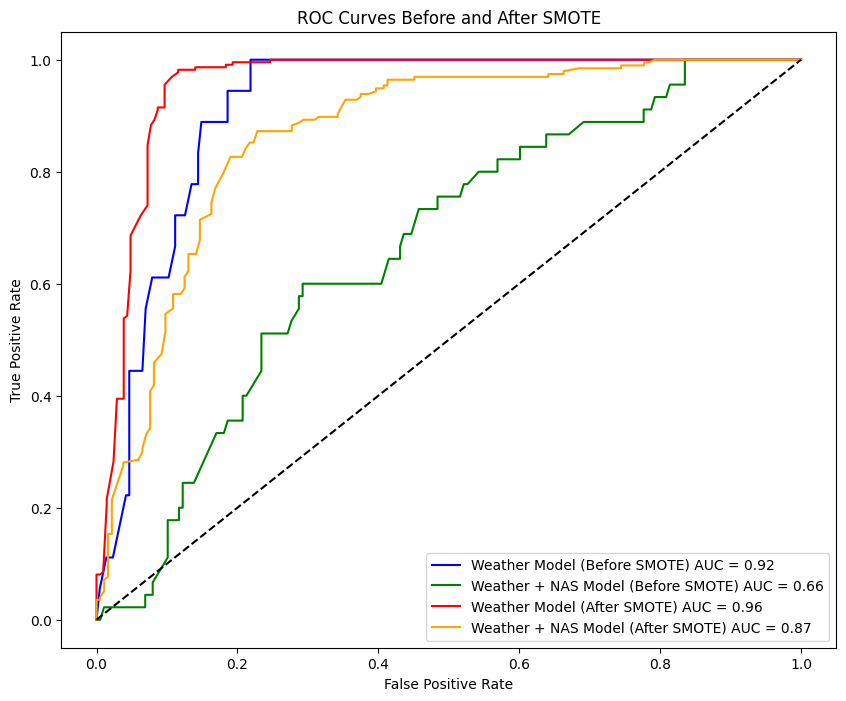

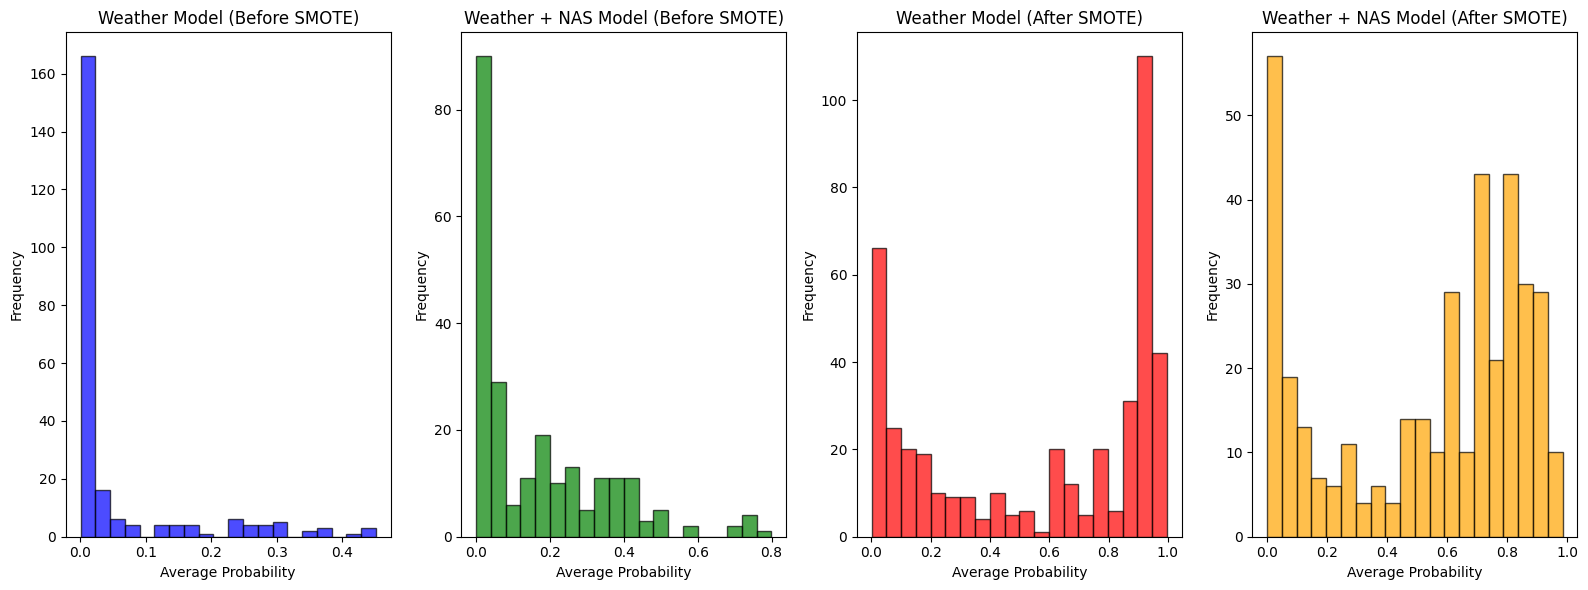


=== Model for weather-related delays ===
Classification report before SMOTE:
               precision    recall  f1-score   support

           0       0.93      0.98      0.95       215
           1       0.29      0.11      0.16        18

    accuracy                           0.91       233
   macro avg       0.61      0.54      0.56       233
weighted avg       0.88      0.91      0.89       233

Classification report after SMOTE:
               precision    recall  f1-score   support

           0       0.98      0.87      0.92       207
           1       0.89      0.98      0.93       223

    accuracy                           0.93       430
   macro avg       0.93      0.93      0.93       430
weighted avg       0.93      0.93      0.93       430


=== Model for weather + NAS-related delays ===
Classification report before SMOTE:
               precision    recall  f1-score   support

           0       0.80      0.92      0.86       188
           1       0.12      0.04    

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score

# Filling missing values with 0
dataset2002 = dataset2002.fillna(0)

# Creating target variables
dataset2002['Flight_Delayed_Weather'] = dataset2002['Delay Weather (Minutes)'].apply(lambda x: 1 if x > 0 else 0)
dataset2002['Flight_Delayed_Weather_NAS'] = dataset2002.apply(lambda x: 1 if (x['Delay Weather (Minutes)'] > 0 or (x['Delay National Aviation System (Minutes)'] > 0 and np.random.rand() < 0.5)) else 0, axis=1)

# Printing for verification
print("Number of 1's in Flight_Delayed_Weather:", dataset2002['Flight_Delayed_Weather'].sum())
print("Number of 1's in Flight_Delayed_Weather_NAS:", dataset2002['Flight_Delayed_Weather_NAS'].sum())

# Preparing data
features = [
    'AWND', 'DAEV', 'DAPR', 'DASF', 'EVAP', 'FMTM', 
    'MDEV', 'MDPR', 'MDSF', 'MNPN', 'MXPN', 'PGTM', 
    'PRCP', 'PSUN', 'SNOW', 'SNWD', 'TAVG', 'TMAX', 
    'TMIN', 'TOBS', 'TSUN', 'WDF2', 'WDF5', 'WDMV', 
    'WESD', 'WSF2', 'WSF5', 'WT03', 'WT04', 'WT07', 
    'WT08', 'WT10', 'WT11', 'WT13', 'WT_FOG', 
    'WT_HAIL', 'WT_RAIN', 'WT_SNOW'
]
df_rf_model = dataset2002[['Flight_Delayed_Weather', 'Flight_Delayed_Weather_NAS'] + features + ['Destination Airport']]

# Encoding and normalization
df_encoded = pd.get_dummies(df_rf_model, columns=['Destination Airport'], drop_first=True)
scaler = StandardScaler()
df_encoded[features] = scaler.fit_transform(df_encoded[features])

# Data splitting
X = df_encoded.drop(['Flight_Delayed_Weather', 'Flight_Delayed_Weather_NAS'], axis=1)
y_weather = df_encoded['Flight_Delayed_Weather']
y_weather_nas = df_encoded['Flight_Delayed_Weather_NAS']

# Applying SMOTE
smote = SMOTE(random_state=42)
X_res_weather, y_res_weather = smote.fit_resample(X, y_weather)
X_res_weather_nas, y_res_weather_nas = smote.fit_resample(X, y_weather_nas)

# Train-test split
X_train_weather, X_test_weather, y_train_weather, y_test_weather = train_test_split(X, y_weather, test_size=0.2, random_state=42)
X_train_weather_nas, X_test_weather_nas, y_train_weather_nas, y_test_weather_nas = train_test_split(X, y_weather_nas, test_size=0.2, random_state=42)

X_train_weather_smote, X_test_weather_smote, y_train_weather_smote, y_test_weather_smote = train_test_split(X_res_weather, y_res_weather, test_size=0.2, random_state=42)
X_train_weather_nas_smote, X_test_weather_nas_smote, y_train_weather_nas_smote, y_test_weather_nas_smote = train_test_split(X_res_weather_nas, y_res_weather_nas, test_size=0.2, random_state=42)

# XGBoost models (before and after SMOTE)
model_weather = xgb.XGBClassifier(random_state=42)
model_weather.fit(X_train_weather, y_train_weather)

model_weather_nas = xgb.XGBClassifier(random_state=42)
model_weather_nas.fit(X_train_weather_nas, y_train_weather_nas)

model_weather_smote = xgb.XGBClassifier(random_state=42)
model_weather_smote.fit(X_train_weather_smote, y_train_weather_smote)

model_weather_nas_smote = xgb.XGBClassifier(random_state=42)
model_weather_nas_smote.fit(X_train_weather_nas_smote, y_train_weather_nas_smote)

# Predictions
y_pred_weather = model_weather.predict(X_test_weather)
y_pred_weather_nas = model_weather_nas.predict(X_test_weather_nas)

y_pred_weather_smote = model_weather_smote.predict(X_test_weather_smote)
y_pred_weather_nas_smote = model_weather_nas_smote.predict(X_test_weather_nas_smote)

# ROC
fpr_weather, tpr_weather, _ = roc_curve(y_test_weather, model_weather.predict_proba(X_test_weather)[:, 1])
roc_auc_weather = auc(fpr_weather, tpr_weather)

fpr_weather_nas, tpr_weather_nas, _ = roc_curve(y_test_weather_nas, model_weather_nas.predict_proba(X_test_weather_nas)[:, 1])
roc_auc_weather_nas = auc(fpr_weather_nas, tpr_weather_nas)

fpr_weather_smote, tpr_weather_smote, _ = roc_curve(y_test_weather_smote, model_weather_smote.predict_proba(X_test_weather_smote)[:, 1])
roc_auc_weather_smote = auc(fpr_weather_smote, tpr_weather_smote)

fpr_weather_nas_smote, tpr_weather_nas_smote, _ = roc_curve(y_test_weather_nas_smote, model_weather_nas_smote.predict_proba(X_test_weather_nas_smote)[:, 1])
roc_auc_weather_nas_smote = auc(fpr_weather_nas_smote, tpr_weather_nas_smote)

#montecarlo simulation 
avg_probs12 = simulate_monte_carlo(model_weather, X_test_weather)
X_test_weather['Avg_Prob_Delay'] = avg_probs12
avg_probs13 = simulate_monte_carlo(model_weather_nas, X_test_weather_nas)
X_test_weather_nas['Avg_Prob_Delay'] = avg_probs13
avg_probs14 = simulate_monte_carlo(model_weather_smote, X_test_weather_smote)
X_test_weather_smote['Avg_Prob_Delay'] = avg_probs14
avg_probs15 = simulate_monte_carlo(model_weather_nas_smote, X_test_weather_nas_smote)
X_test_weather_nas_smote['Avg_Prob_Delay'] = avg_probs15 


# Plotting
plt.figure(figsize=(10, 8))

plt.plot(fpr_weather, tpr_weather, color='blue', label=f'Weather Model (Before SMOTE) AUC = {roc_auc_weather:.2f}')
plt.plot(fpr_weather_nas, tpr_weather_nas, color='green', label=f'Weather + NAS Model (Before SMOTE) AUC = {roc_auc_weather_nas:.2f}')
plt.plot(fpr_weather_smote, tpr_weather_smote, color='red', label=f'Weather Model (After SMOTE) AUC = {roc_auc_weather_smote:.2f}')
plt.plot(fpr_weather_nas_smote, tpr_weather_nas_smote, color='orange', label=f'Weather + NAS Model (After SMOTE) AUC = {roc_auc_weather_nas_smote:.2f}')

plt.plot([0, 1], [0, 1], color='black', linestyle='--')  # Chance diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Before and After SMOTE')
plt.legend(loc='lower right')
plt.show()

# Plotting histograms for the mean probabilities (Monte Carlo simulation)
plt.figure(figsize=(16, 6))

plt.subplot(1, 4, 1)
plt.hist(avg_probs12, bins=20, color='blue', alpha=0.7, edgecolor='black')
plt.xlabel('Average Probability')
plt.ylabel('Frequency')
plt.title('Weather Model (Before SMOTE)')

plt.subplot(1, 4, 2)
plt.hist(avg_probs13, bins=20, color='green', alpha=0.7, edgecolor='black')
plt.xlabel('Average Probability')
plt.ylabel('Frequency')
plt.title('Weather + NAS Model (Before SMOTE)')

plt.subplot(1, 4, 3)
plt.hist(avg_probs14, bins=20, color='red', alpha=0.7, edgecolor='black')
plt.xlabel('Average Probability')
plt.ylabel('Frequency')
plt.title('Weather Model (After SMOTE)')

plt.subplot(1, 4, 4)
plt.hist(avg_probs15, bins=20, color='orange', alpha=0.7, edgecolor='black')
plt.xlabel('Average Probability')
plt.ylabel('Frequency')
plt.title('Weather + NAS Model (After SMOTE)')

plt.tight_layout()
plt.show()


# Evaluation
print("\n=== Model for weather-related delays ===")
print("Classification report before SMOTE:\n", classification_report(y_test_weather, y_pred_weather))
print("Classification report after SMOTE:\n", classification_report(y_test_weather_smote, y_pred_weather_smote))

print("\n=== Model for weather + NAS-related delays ===")
print("Classification report before SMOTE:\n", classification_report(y_test_weather_nas, y_pred_weather_nas))
print("Classification report after SMOTE:\n", classification_report(y_test_weather_nas_smote, y_pred_weather_nas_smote))

# Comparison of the number of 1's before and after SMOTE
print("\n=== Comparison of the number of 1's before and after SMOTE (only weather) ===")
print("Number of 1's in y_weather (before SMOTE):", y_train_weather.sum())
print("Number of 1's in y_weather_smote (after SMOTE):", y_train_weather_smote.sum())

print("\n=== Comparison of the number of 1's before and after SMOTE (weather + NAS) ===")
print("Number of 1's in y_weather_nas (before SMOTE):", y_train_weather_nas.sum())
print("Number of 1's in y_weather_nas_smote (after SMOTE):", y_train_weather_nas_smote.sum())
